In [12]:
# load both MR and CT

import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

MR_path = "MR_00008.nii.gz"
CT_path = "CT_00008.nii.gz"

MR_img = nib.load(MR_path)
CT_img = nib.load(CT_path)

MR_data = MR_img.get_fdata()
CT_data = CT_img.get_fdata()

print("MR shape: ", MR_data.shape)
print("CT shape: ", CT_data.shape)

# normalize MR and CT
MR_data = np.clip(MR_data, 0, 3000)
CT_data = np.clip(CT_data, -1024, 3000)

MR_data = MR_data / 3000
CT_data = CT_data / 4024

MR shape:  (256, 256, 140)
CT shape:  (256, 256, 140)


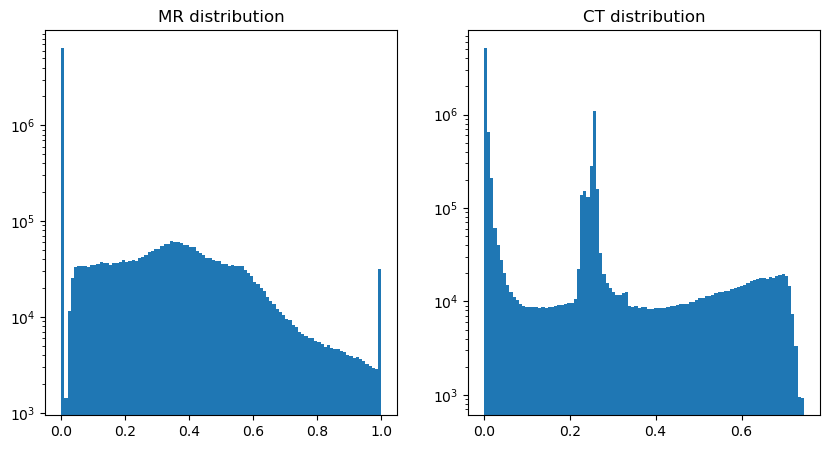

In [13]:
# plot the distribution of MR and CT

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(MR_data.flatten(), bins=100)
plt.title("MR distribution")
plt.yscale("log")
plt.subplot(1, 2, 2)
plt.hist(CT_data.flatten(), bins=100)
plt.title("CT distribution")
plt.yscale("log")
plt.show()


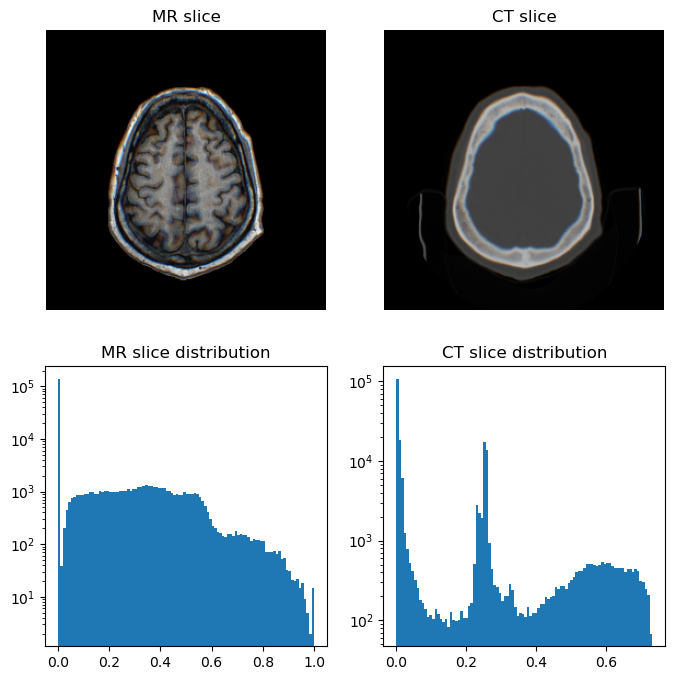

In [14]:
# show some index slices for both MR and CT

idx_slice = 100
MR_slice = np.rot90(MR_data[:, :, idx_slice-1:idx_slice+2])
CT_slice = np.rot90(CT_data[:, :, idx_slice-1:idx_slice+2])

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(MR_slice, cmap="gray")
plt.title("MR slice")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(CT_slice, cmap="gray")
plt.title("CT slice")
plt.axis("off")

# plot the distribution of MR_slice and CT_slice
plt.subplot(2, 2, 3)
plt.hist(MR_slice.flatten(), bins=100)
plt.title("MR slice distribution")
plt.yscale("log")
plt.subplot(2, 2, 4)
plt.hist(CT_slice.flatten(), bins=100)
plt.title("CT slice distribution")
plt.yscale("log")

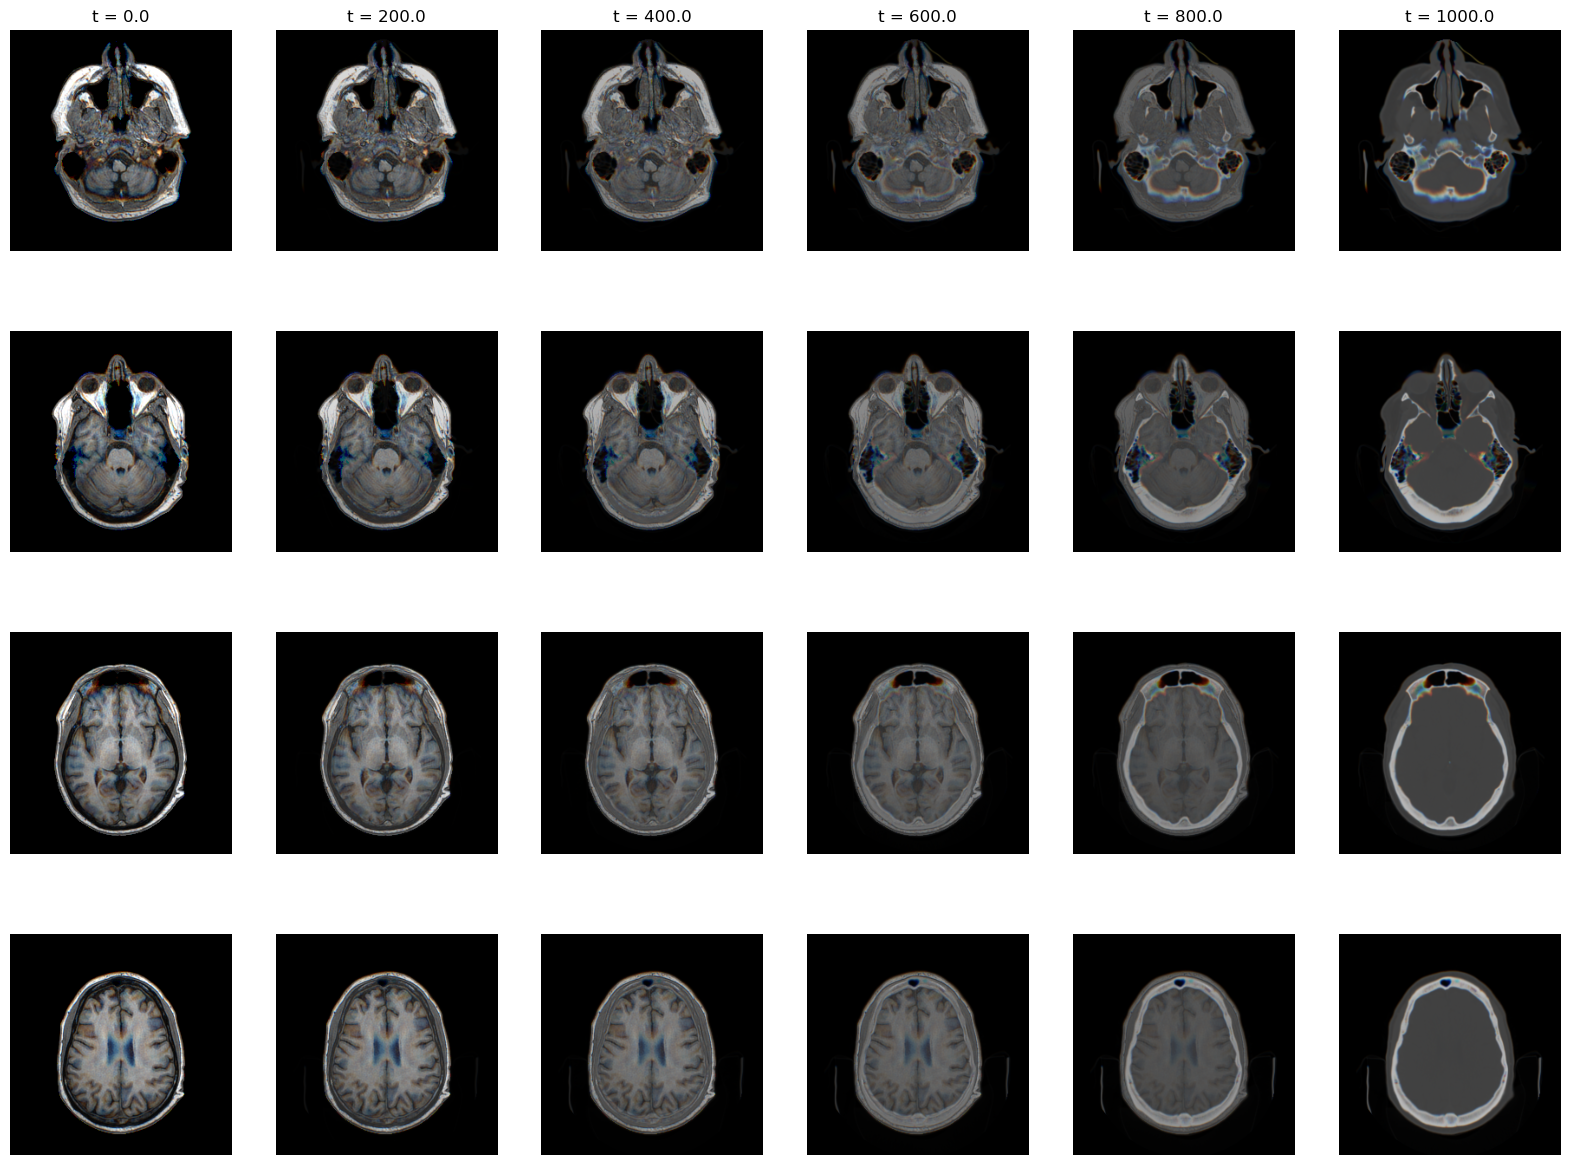

In [42]:
# fuse MR and CT by the following equation, t = divided uniformly from 0 to 1000 by n entrys and plot the image
# plot the 1*5 figures
# now takes different slices, with 4 rows in total

plt.figure(figsize=(20, 15))
n_entry = 6
n_case = 4
entry = np.linspace(0, 1000, n_entry)
idx_set = np.linspace(5, MR_data.shape[2]-5, n_entry, dtype=int)

for p in range(n_case):
    random_slice = idx_set[p]
    for idx_t, t in enumerate(entry):
        alpha = (1000-t)/1000
        MR_slice = np.rot90(MR_data[:, :, random_slice-1:random_slice+2])
        CT_slice = np.rot90(CT_data[:, :, random_slice-1:random_slice+2])
        fused_img = alpha * MR_slice + ( 1 - alpha) * CT_slice
        plt.subplot(n_case, n_entry, p*n_entry+idx_t+1)
        plt.imshow(fused_img, cmap="gray")
        if p ==0 :
            plt.title("t = {}".format(t))
        plt.axis("off")
plt.savefig("MR2CT_fusion.png", dpi=300)


In [41]:
idx_set

array([ 35, 221, 407, 592, 778, 964])